<a href="https://colab.research.google.com/github/aydelia/mobile1/blob/main/Tugas%20P14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama   : Adelia Nur Oktariani  
NIM    : 312310096   
Kelas  : TI.23.C2
  

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
# Membaca data dari file
file_path = r"/content/DATA TUGAS REGRESI LOGISTIK.xlsx"
df = pd.read_excel (file_path)

df

,BPNT,Klasifikasi Desa Kota,Jumlah Balita,Jumlah ART,Status Tempat Tinggal,Luas Bangunan,Jenis Atap,Jenis Dinding,Sumber Air Minum,Bahan Bakar Masak,Fasilitas KUR,Motor,Mobil,Penghasilan Utama
0,0,1,0,4,1,112,2,1,1,1,2,1,1,1
1,0,1,0,6,1,120,2,1,1,1,2,1,1,1
2,0,1,0,3,1,120,2,1,1,1,1,1,2,1
3,0,1,0,2,1,180,2,1,1,1,2,1,1,2
4,0,1,1,5,1,180,2,2,2,1,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910,0,2,0,6,1,72,2,1,3,1,2,1,2,1
1911,0,2,0,5,1,54,2,1,3,1,2,1,2,1
1912,0,2,0,1,1,54,2,1,3,3,2,2,2,1
1913,0,2,0,1,1,45,2,3,2,3,2,2,2,2


In [ ]:
# Pastikan tidak ada nilai kosong
print("\nMissing Values Check:")
print(df.isnull().sum())


Missing Values Check:
BPNT                     0
Klasifikasi Desa Kota    0
Jumlah Balita            0
Jumlah ART               0
Status Tempat Tinggal    0
Luas Bangunan            0
Jenis Atap               0
Jenis Dinding            0
Sumber Air Minum         0
Bahan Bakar Masak        0
Fasilitas KUR            0
Motor                    0
Mobil                    0
Penghasilan Utama        0
dtype: int64


In [ ]:
# Pisahkan variabel prediktor dan respon
X = df[['Klasifikasi Desa Kota', 'Jumlah Balita', 'Jumlah ART', 'Status Tempat Tinggal', 'Luas Bangunan', 'Jenis Atap', 'Jenis Dinding', 'Sumber Air Minum', 'Bahan Bakar Masak', 'Fasilitas KUR', 'Motor', 'Mobil', 'Penghasilan Utama']]  # Variabel prediktor
y = df['BPNT']  # Variabel respon

In [ ]:
# Tambahkan konstanta untuk model statsmodels
X = sm.add_constant(X)

X

,const,Klasifikasi Desa Kota,Jumlah Balita,Jumlah ART,Status Tempat Tinggal,Luas Bangunan,Jenis Atap,Jenis Dinding,Sumber Air Minum,Bahan Bakar Masak,Fasilitas KUR,Motor,Mobil,Penghasilan Utama
0,1.0,1,0,4,1,112,2,1,1,1,2,1,1,1
1,1.0,1,0,6,1,120,2,1,1,1,2,1,1,1
2,1.0,1,0,3,1,120,2,1,1,1,1,1,2,1
3,1.0,1,0,2,1,180,2,1,1,1,2,1,1,2
4,1.0,1,1,5,1,180,2,2,2,1,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910,1.0,2,0,6,1,72,2,1,3,1,2,1,2,1
1911,1.0,2,0,5,1,54,2,1,3,1,2,1,2,1
1912,1.0,2,0,1,1,54,2,1,3,3,2,2,2,1
1913,1.0,2,0,1,1,45,2,3,2,3,2,2,2,2


In [ ]:
# Pisahkan data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Membuat model regresi logistik menggunakan statsmodels
model = sm.Logit(y_train, X_train)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.565829
         Iterations 7


In [ ]:
# Menampilkan summary model
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                   BPNT   No. Observations:                 1340
Model:                          Logit   Df Residuals:                     1326
Method:                           MLE   Df Model:                           13
Date:                Sun, 29 Dec 2024   Pseudo R-squ.:                 0.08657
Time:                        10:44:25   Log-Likelihood:                -758.21
converged:                       True   LL-Null:                       -830.07
Covariance Type:            nonrobust   LLR p-value:                 3.765e-24
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -7.1481      1.265     -5.649      0.000      -9.628      -4.668
Klasifikasi Desa Kota     0.0806      0.142      0.568      0.570      -0.197       0.359
Jumlah B

In [ ]:
# Prediksi menggunakan model statsmodels
y_pred = result.predict(X_test) > 0.5
y_prob = result.predict(X_test)

In [ ]:
# Membuat DataFrame dari y_pred dan y_prob
prediksi = pd.DataFrame({
    'y_test': y_test,
    'Prediksi': y_pred,
    'Probabilitas': y_prob
})

# Menampilkan DataFrame
print(prediksi)

      y_test  Prediksi  Probabilitas
1232       0     False      0.228094
111        0     False      0.293567
316        0     False      0.217051
781        0     False      0.360694
416        0     False      0.064553
...      ...       ...           ...
1829       0     False      0.275427
493        0     False      0.343569
1402       0     False      0.386429
277        0     False      0.031451
1768       0     False      0.307248

[575 rows x 3 columns]


In [ ]:
# Ukuran kebaikan model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7373913043478261
Confusion Matrix:
 [[389  21]
 [130  35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.95      0.84       410
           1       0.62      0.21      0.32       165

    accuracy                           0.74       575
   macro avg       0.69      0.58      0.58       575
weighted avg       0.71      0.74      0.69       575



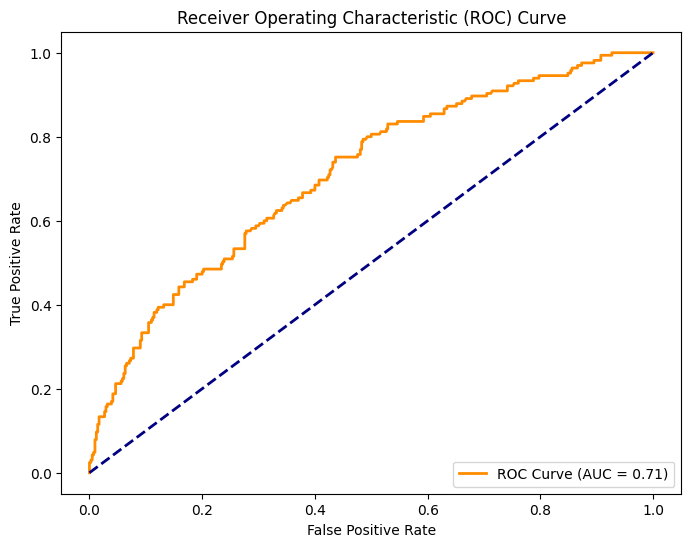

AUC: 0.71


In [ ]:
# Kurva ROC dan AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Menampilkan nilai AUC
print(f"AUC: {roc_auc:.2f}")

In [ ]:
# Mendapatkan Odds Ratio
odds_ratios = np.exp(result.params)  # Menghitung nilai Odds Ratio

# Menampilkan Koefisien dan Odds Ratio
odds_ratios_df = pd.DataFrame({
    'Variable': result.params.index,  # Nama variabel
    'Coefficient (β)': result.params.values,  # Koefisien logistik
    'Odds Ratio': odds_ratios.values  # Odds Ratio
})

print(odds_ratios_df)

                 Variable  Coefficient (β)  Odds Ratio
0                   const        -7.148104    0.000786
1   Klasifikasi Desa Kota         0.080575    1.083911
2           Jumlah Balita        -0.481359    0.617943
3              Jumlah ART         0.332464    1.394400
4   Status Tempat Tinggal        -0.213551    0.807711
5           Luas Bangunan        -0.003641    0.996366
6              Jenis Atap        -0.155260    0.856193
7           Jenis Dinding         0.450190    1.568610
8        Sumber Air Minum         0.089695    1.093840
9       Bahan Bakar Masak         0.137797    1.147742
10          Fasilitas KUR        -0.044005    0.956949
11                  Motor         0.744039    2.104418
12                  Mobil         2.291270    9.887482
13      Penghasilan Utama        -0.212983    0.808170


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Fungsi untuk menghitung VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Menghitung VIF untuk variabel di training set
vif_result = calculate_vif(X_train)
print(vif_result)

                 Variable         VIF
0                   const  190.430602
1   Klasifikasi Desa Kota    1.136640
2           Jumlah Balita    1.310427
3              Jumlah ART    1.543778
4   Status Tempat Tinggal    1.041832
5           Luas Bangunan    1.177738
6              Jenis Atap    1.095155
7           Jenis Dinding    1.145610
8        Sumber Air Minum    1.158024
9       Bahan Bakar Masak    1.101906
10          Fasilitas KUR    1.041918
11                  Motor    1.321557
12                  Mobil    1.076396
13      Penghasilan Utama    1.162032


#Deskripsi
Dataset dengan beberapa variabel yang merepresentasikan karakteristik rumah tangga tertentu, seperti program bantuan, kondisi tempat tinggal, dan kepemilikan aset. Berikut adalah deskripsi masing-masing kolom:

BPNT: Indikator kepesertaan dalam program Bantuan Pangan Non-Tunai (BPNT).
    0: Tidak menerima BPNT.
    1: Menerima BPNT.

Klasifikasi Desa/Kota: Klasifikasi tempat tinggal.
    1: Desa.
    2: Kota.

Jumlah Balita: Jumlah anak berusia di bawah lima tahun dalam rumah tangga.

Jumlah ART: Jumlah Anggota Rumah Tangga (ART).

Status Tempat Tinggal: Status kepemilikan tempat tinggal.
    1: Milik sendiri.

Luas Bangunan: Luas bangunan tempat tinggal (dalam meter persegi).

Jenis Atap: Jenis material atap rumah.
    1: Material atap berkualitas rendah (seperti rumbia).
    2: Material atap berkualitas tinggi (seperti genteng).

Jenis Dinding: Jenis material dinding rumah.
    1: Material dinding berkualitas rendah (seperti bambu).
    2: Material dinding berkualitas tinggi (seperti tembok).

Sumber Air Minum: Sumber utama air minum rumah tangga.
    1: Air bersih.
    2: Air tidak bersih.

Bahan Bakar Masak: Jenis bahan bakar yang digunakan untuk memasak.
    1: Bahan bakar modern (seperti gas).
    2: Bahan bakar tradisional (seperti kayu bakar).

Fasilitas KUR: Kepemilikan fasilitas Kredit Usaha Rakyat (KUR).
    1: Tidak memiliki KUR.
    2: Memiliki KUR.

Motor: Kepemilikan kendaraan bermotor roda dua.
    1: Tidak memiliki motor.
    2: Memiliki motor.

Mobil: Kepemilikan kendaraan bermotor roda empat.
    1: Tidak memiliki mobil.
    2: Memiliki mobil.

Penghasilan Utama: Kategori penghasilan utama rumah tangga.

Data ini dapat digunakan untuk analisis sosial, ekonomi, atau untuk menentukan penerima manfaat program sosial berdasarkan berbagai kriteria